In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
!pip install --upgrade matplotlib seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
!pip install missingno
import missingno as msno
from sklearn.metrics import classification_report
from scipy.stats import zscore


sns.set(color_codes = True)
pd.set_option('display.max_columns', 100)

import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
df.shape

(2111, 17)

In [14]:
df['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [15]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [16]:
df['CALC'].value_counts()


CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [17]:
df.groupby(['Gender','NObeyesdad']).NObeyesdad.count()

Gender  NObeyesdad         
Female  Insufficient_Weight    173
        Normal_Weight          141
        Obesity_Type_I         156
        Obesity_Type_II          2
        Obesity_Type_III       323
        Overweight_Level_I     145
        Overweight_Level_II    103
Male    Insufficient_Weight     99
        Normal_Weight          146
        Obesity_Type_I         195
        Obesity_Type_II        295
        Obesity_Type_III         1
        Overweight_Level_I     145
        Overweight_Level_II    187
Name: NObeyesdad, dtype: int64

In [18]:
df.groupby(['SMOKE','NObeyesdad']).NObeyesdad.count()

SMOKE  NObeyesdad         
no     Insufficient_Weight    271
       Normal_Weight          274
       Obesity_Type_I         345
       Obesity_Type_II        282
       Obesity_Type_III       323
       Overweight_Level_I     287
       Overweight_Level_II    285
yes    Insufficient_Weight      1
       Normal_Weight           13
       Obesity_Type_I           6
       Obesity_Type_II         15
       Obesity_Type_III         1
       Overweight_Level_I       3
       Overweight_Level_II      5
Name: NObeyesdad, dtype: int64

# Observation: The majority of smokers are in the lower weight categories, with only a small representation in Obesity levels.
Very few smokers fall into Obesity_Type_III (only 1 person) compared to non-smokers.

3. Key Insights:

Non-Smokers and Higher Obesity Rates: Non-smokers show significantly higher rates of obesity across all types 
    (Obesity_Type_I, Obesity_Type_II, and Obesity_Type_III). This could indicate that, within this dataset, smoking is not 
    strongly associated with higher obesity levels.

Smokers and Lower Weight Categories: Smokers are predominantly in the lower weight categories (Insufficient_Weight and Normal_Weight), 
    with only a few in the obesity categories. This suggests that smoking is more prevalent among individuals in the lower weight ranges 
    in this dataset.


In [19]:
df.groupby(['CALC','NObeyesdad']).NObeyesdad.count()

CALC        NObeyesdad         
Always      Normal_Weight            1
Frequently  Insufficient_Weight      1
            Normal_Weight           18
            Obesity_Type_I          14
            Obesity_Type_II          2
            Overweight_Level_I      16
            Overweight_Level_II     19
Sometimes   Insufficient_Weight    154
            Normal_Weight          161
            Obesity_Type_I         172
            Obesity_Type_II        224
            Obesity_Type_III       323
            Overweight_Level_I     224
            Overweight_Level_II    143
no          Insufficient_Weight    117
            Normal_Weight          107
            Obesity_Type_I         165
            Obesity_Type_II         71
            Obesity_Type_III         1
            Overweight_Level_I      50
            Overweight_Level_II    128
Name: NObeyesdad, dtype: int64

#General Observation of Alcohol Consumption and Obesity:

People are categorized by their frequency of alcohol consumption (Always, Frequently, Sometimes, No).

Each frequency of alcohol consumption is associated with different weight categories: Insufficient_Weight, Normal_Weight, 
Overweight (Levels I and II), and Obesity (Types I, II, and III).


#Detailed Observations:

1. Always Consume Alcohol

Only one individual falls in the Normal_Weight category with no cases of overweight or obesity.


2. Frequently Consume Alcohol

Normal Weight: 18 individuals.

Overweight Levels I and II: 16 and 19 individuals, respectively.

Obesity (Type I and II): 14 and 2 individuals, respectively.

Insufficient Weight: Only 1 individual.


Observation: Among those who frequently consume alcohol, most individuals are within the overweight categories, 
    with fewer in the obesity or normal weight categories.

3. Sometimes Consume Alcohol

Normal Weight: 161 individuals.

Insufficient Weight: 154 individuals.

Overweight Levels I and II: 224 and 143 individuals, respectively.

Obesity (Type I, II, and III): 172, 224, and 323 individuals, respectively.


Observation: The majority in this group fall into the Obesity_Type_III category, showing that occasional alcohol consumption is 
linked with higher counts in obesity types, especially Type_III.

4. No Alcohol Consumption

Normal Weight: 107 individuals.

Insufficient Weight: 117 individuals.

Overweight Levels I and II: 50 and 128 individuals, respectively.

Obesity (Type I, II, and III): 165, 71, and 1 individuals, respectively.
Observation: The majority in this group have Insufficient_Weight, Normal_Weight, or fall within the lower obesity levels, 
    with only one person in Obesity_Type_III. This suggests that non-drinkers tend to have lower obesity levels compared to 
    those who consume alcohol frequently or sometimes.

Key Insights:
Alcohol Consumption and Obesity: Higher frequency of alcohol consumption correlates with a higher incidence of obesity,
    especially in the Sometimes category, which has a large number of individuals in Obesity_Type_III.

Non-Drinkers and Lower Weight: Individuals who do not consume alcohol tend to fall in the Insufficient_Weight and Normal_Weight categories,
    with fewer in higher obesity levels.

Moderate Drinkers and Overweight Levels: Frequent alcohol consumers show higher counts in the overweight categories rather than obesity, 
    suggesting a tendency toward moderate weight gain rather than severe obesity.

Conclusion:
Alcohol consumption frequency seems to impact weight, with non-drinkers showing lower obesity rates and heavier drinkers 
    showing higher obesity prevalence, particularly in Obesity_Type_III among those who sometimes drink.

In [20]:
df['Age'].value_counts()

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df[1:50]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I


In [23]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
Encoder= LabelEncoder()

In [25]:
data=df.copy()

In [26]:
data['Gender']=Encoder.fit_transform(data['Gender'])
data['CAEC']=Encoder.fit_transform(data['CAEC'])
data['SMOKE']=Encoder.fit_transform(data['SMOKE'])
data['SCC']=Encoder.fit_transform(data['SCC'])
data['CALC']=Encoder.fit_transform(data['CALC'])
data['family_history_with_overweight']=Encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC']=Encoder.fit_transform(data['FAVC'])

In [27]:
data=pd.get_dummies(data,columns=['NObeyesdad', 'MTRANS'])

In [28]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,False,True,False,False,False,False,False,False,False,False,True,False
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,False,True,False,False,False,False,False,False,False,False,True,False
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,False,True,False,False,False,False,False,False,False,False,True,False
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,False,False,False,False,False,True,False,False,False,False,False,True
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,False,False,False,False,False,False,True,False,False,False,True,False


# OUTLIER DETECTION AND HANDLING

In [29]:
data_zscore = data.apply(zscore)
outliers = (data_zscore > 3).sum(axis=0)
print(outliers)

Gender                             0
Age                               23
Height                             0
Weight                             1
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               0
SMOKE                             44
CH2O                               0
SCC                               96
FAF                                0
TUE                                0
CALC                               0
NObeyesdad_Insufficient_Weight     0
NObeyesdad_Normal_Weight           0
NObeyesdad_Obesity_Type_I          0
NObeyesdad_Obesity_Type_II         0
NObeyesdad_Obesity_Type_III        0
NObeyesdad_Overweight_Level_I      0
NObeyesdad_Overweight_Level_II     0
MTRANS_Automobile                  0
MTRANS_Bike                        7
MTRANS_Motorbike                  11
MTRANS_Public_Transportation       0
MTRANS_Walking                    55
d

In [30]:
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

# Cap weight outlier at Q1 - 1.5*IQR or Q3 + 1.5*IQR boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Weight'] = data['Weight'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [31]:
#Check the mode for SMOKE and SCC columns
smoke_mode = data['SMOKE'].mode()[0]
scc_mode = data['SCC'].mode()[0]

In [32]:
# INput outliers in SMOKE and SCC with their respective modes
data['SMOKE'] = data['SMOKE'].fillna(smoke_mode)
data['SCC'] = data['SCC'].fillna(scc_mode)

In [33]:
# Confirm the imputation
print("Updated SMOKE column:", data['SMOKE'].value_counts())
print("Updated SCC column:", data['SCC'].value_counts())

Updated SMOKE column: SMOKE
0    2043
1      44
Name: count, dtype: int64
Updated SCC column: SCC
0    1991
1      96
Name: count, dtype: int64


In [34]:
# Combine low-frequency MTRANS columns into a single category
data['MTRANS_Other'] = data[['MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Walking']].sum(axis=1)
data.drop(columns=['MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Walking'], inplace=True)

# DATA NORMALIZATION AND STANDARDIZATION

In [35]:
scaler = MinMaxScaler()
data[['Age', 'Height', 'Weight']] = scaler.fit_transform(data[['Age', 'Height', 'Weight']])

In [36]:
scaler = StandardScaler()
data[['Age', 'Height', 'Weight']] = scaler.fit_transform(data[['Age', 'Height', 'Weight']])

# EXPLORATORY DATA ANALYSIS

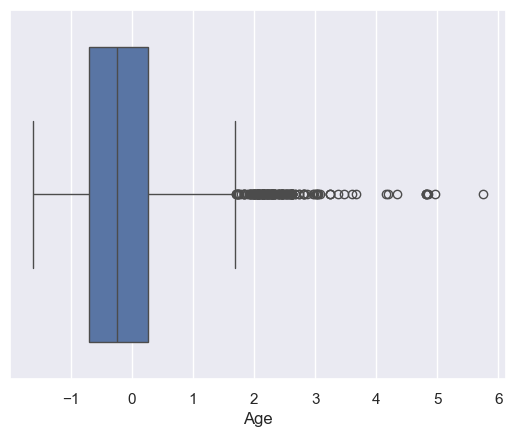

In [37]:
sns.boxplot(x=data['Age'])
plt.show()

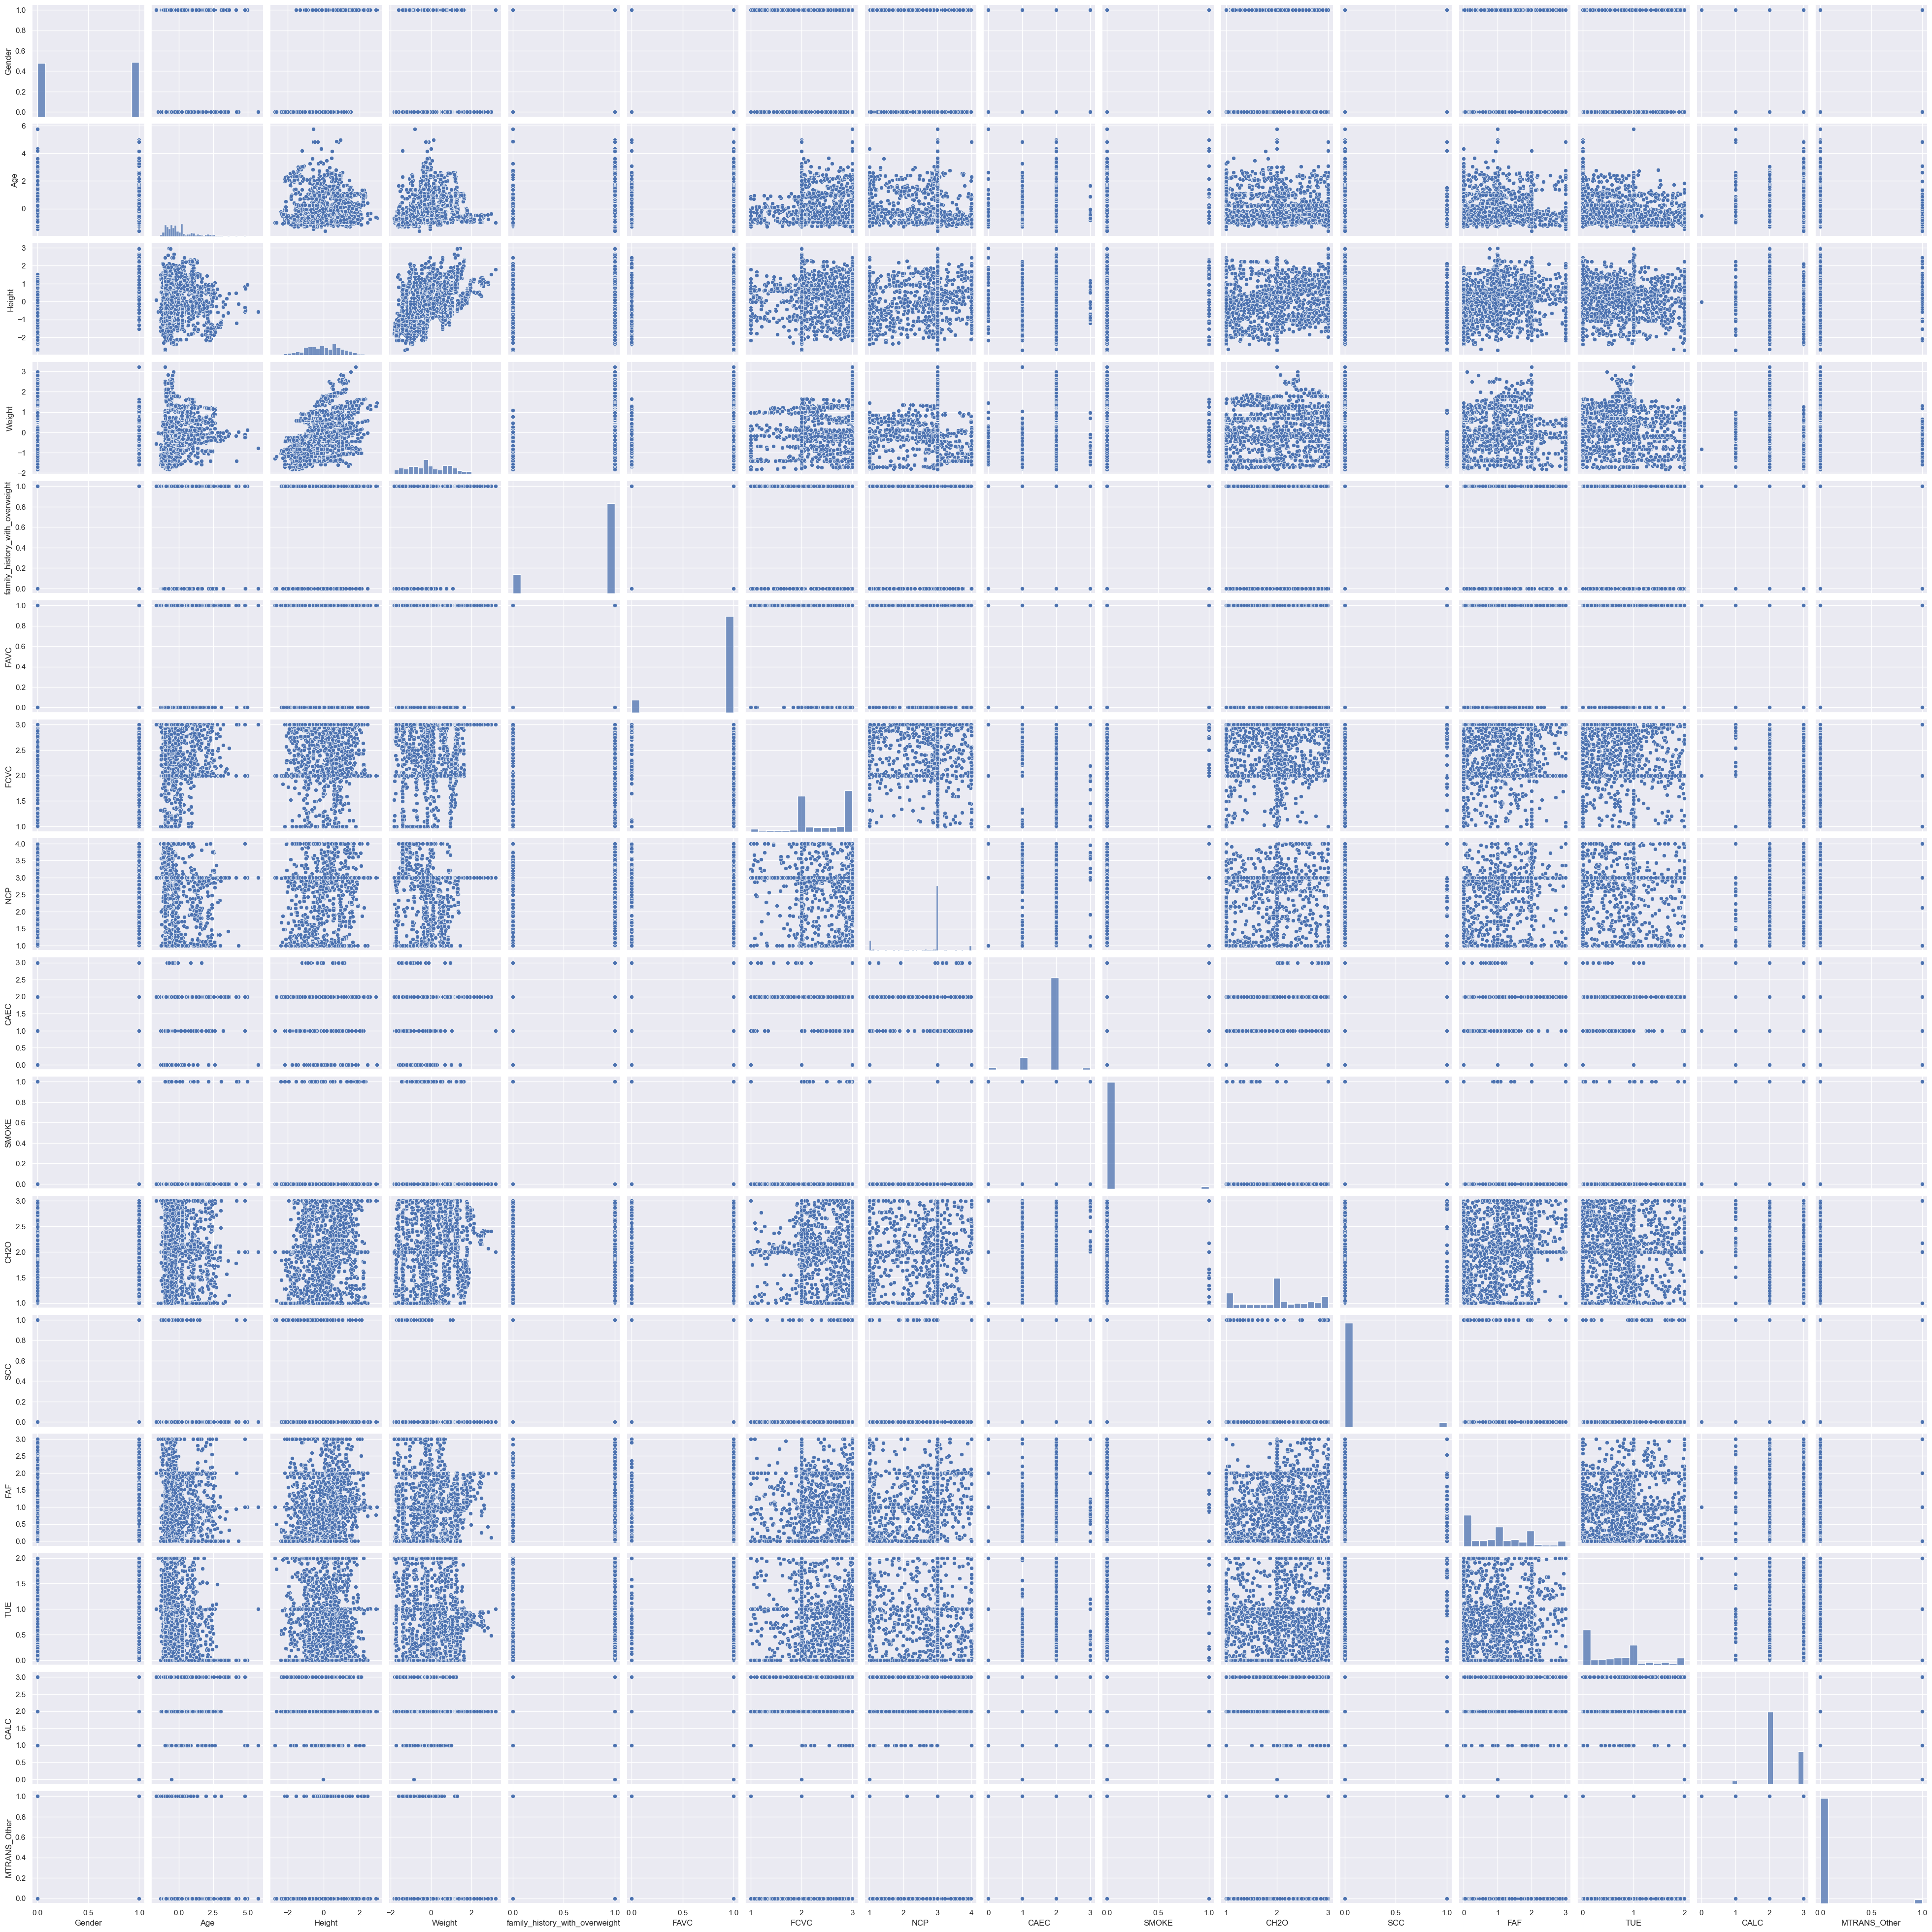

In [38]:
numeric_data = data.select_dtypes(include=['float', 'int'])
sns.pairplot(numeric_data)
plt.show()

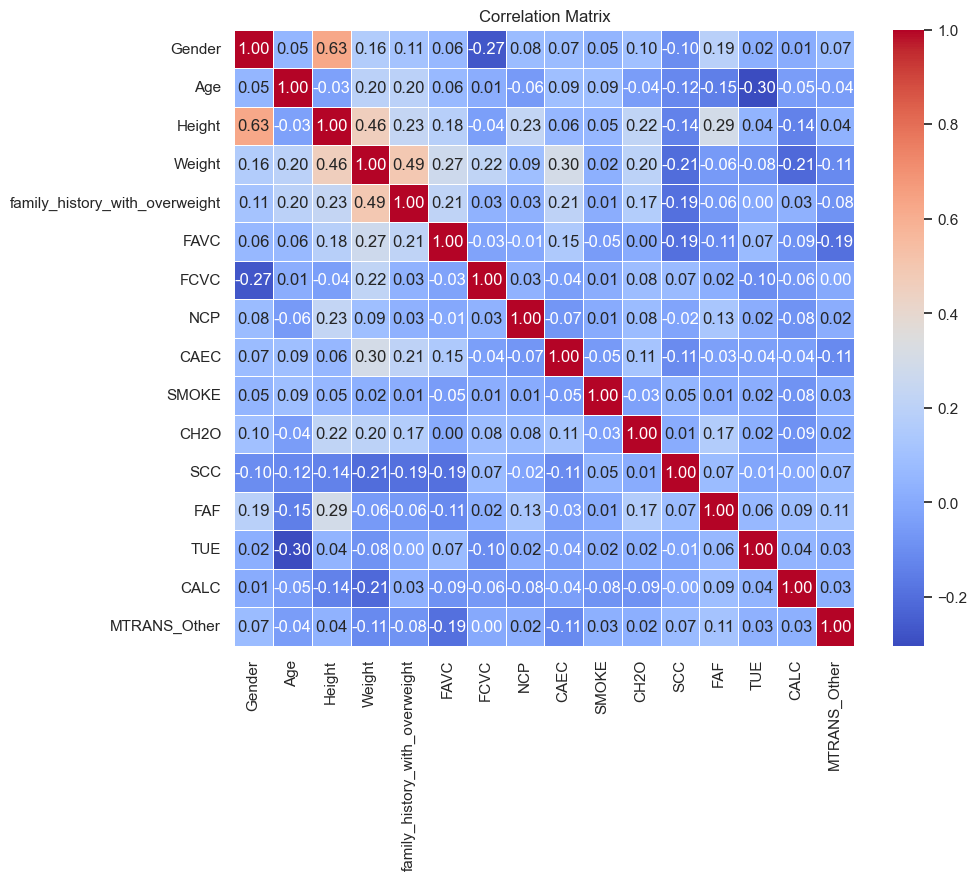

In [39]:
# Correlation heatmap for numerical columns
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

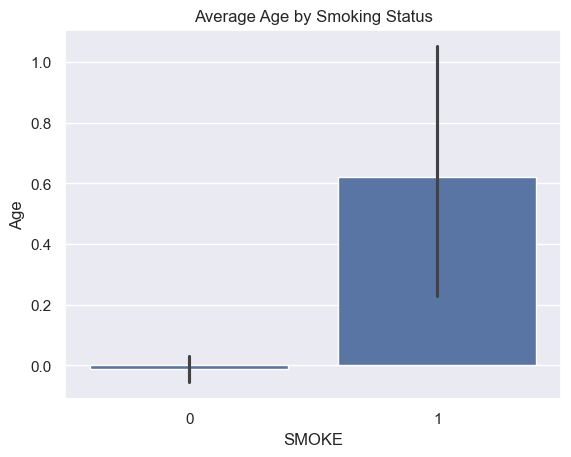

In [40]:
# Barplot for 'SMOKE' (smoking status) vs 'Age'
sns.barplot(x='SMOKE', y='Age', data=data)
plt.title('Average Age by Smoking Status')
plt.show()

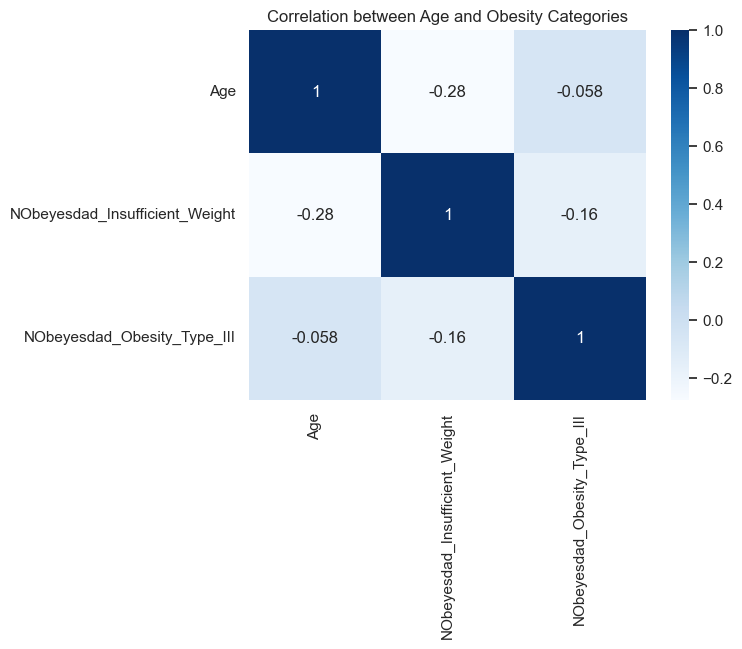

In [41]:
# Heatmap of 'Age' and 'NObeyesdad' (Obesity classes)
age_obesity_data = data[['Age', 'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Obesity_Type_III']]
sns.heatmap(age_obesity_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation between Age and Obesity Categories')
plt.show()

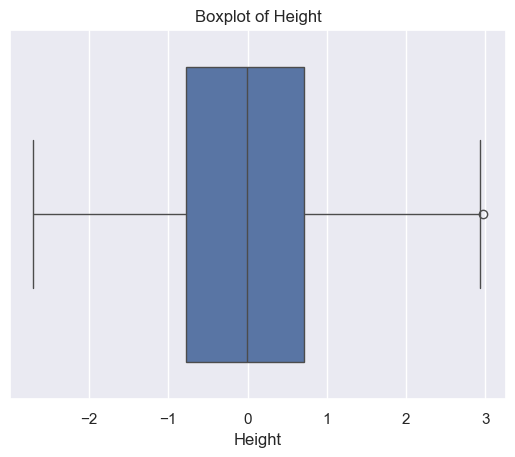

In [42]:
# Boxplot for 'Height'
sns.boxplot(x=data['Height'])
plt.title('Boxplot of Height')
plt.show()

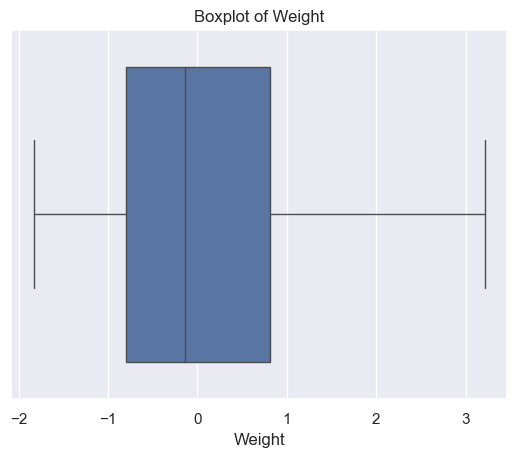

In [43]:
# Boxplot for 'Weight'
sns.boxplot(x=data['Weight'])
plt.title('Boxplot of Weight')
plt.show()

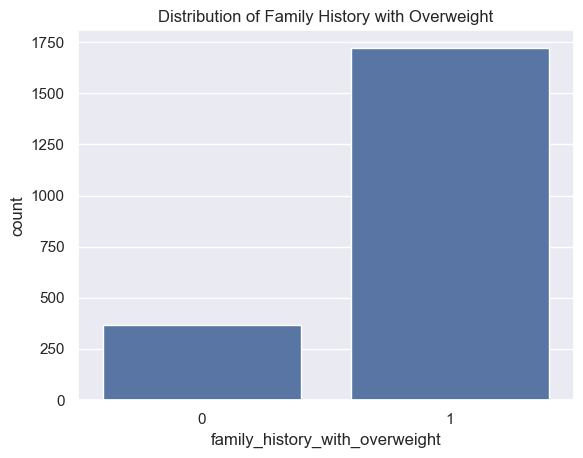

In [44]:
# Countplot for 'family_history_with_overweight'
sns.countplot(x='family_history_with_overweight', data=data)
plt.title('Distribution of Family History with Overweight')
plt.show()

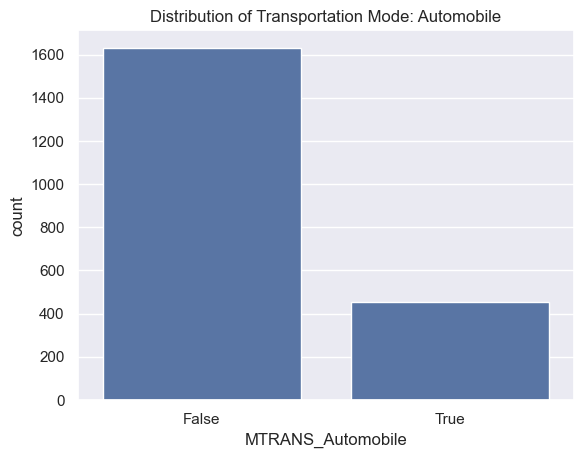

In [45]:
# Countplot for 'MTRANS_Automobile' (Mode of transport)
sns.countplot(x='MTRANS_Automobile', data=data)
plt.title('Distribution of Transportation Mode: Automobile')
plt.show()

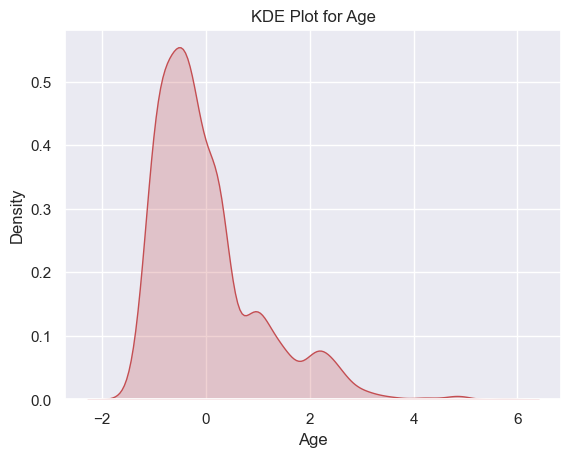

In [46]:
# KDE plot for 'Age'
sns.kdeplot(data['Age'], shade=True, color='r')
plt.title('KDE Plot for Age')
plt.show()

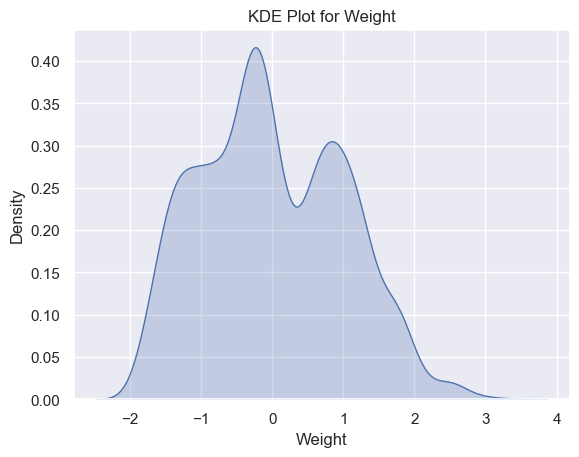

In [47]:
# KDE plot for 'Weight'
sns.kdeplot(data['Weight'], shade=True, color='b')
plt.title('KDE Plot for Weight')
plt.show()

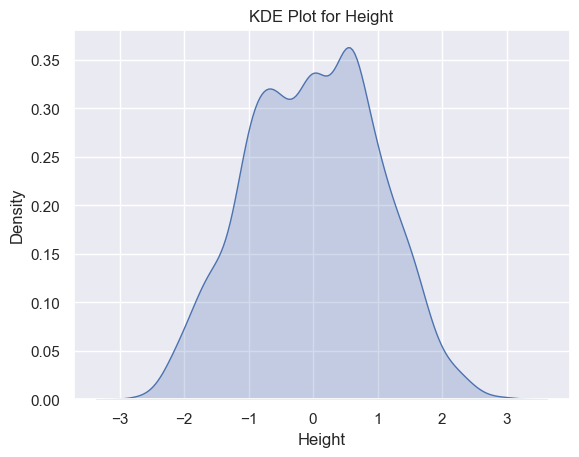

In [48]:
# KDE plot for 'height'
sns.kdeplot(data['Height'], shade=True, color='b')
plt.title('KDE Plot for Height')
plt.show()

In [49]:
# Generate summary statistics for numerical columns
numerical_summary = data.describe()
numerical_summary

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Other
count,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,-2.723690e-17,5.311196e-16,1.634214e-16,0.825108,0.883565,2.421466,2.701179,1.853857,0.021083,2.004749,0.045999,1.012812,0.663035,2.270244,0.034978
std,0.500103,1.000240e+00,1.000240e+00,1.000240e+00,0.379966,0.320823,0.534737,0.764614,0.459494,0.143695,0.608284,0.209533,0.853475,0.608153,0.517008,0.183769
min,0.000000,-1.625984e+00,-2.712155e+00,-1.827923e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.968683e-01,-7.781538e-01,-7.966609e-01,1.000000,1.000000,2.000000,2.697467,2.000000,0.000000,1.590922,0.000000,0.124505,0.000000,2.000000,0.000000
50%,1.000000,-2.364389e-01,-1.170116e-02,-1.434864e-01,1.000000,1.000000,2.396265,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.630866,2.000000,0.000000
75%,1.000000,2.586523e-01,7.172047e-01,8.081318e-01,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.466193,0.000000,1.678102,1.000000,3.000000,0.000000
max,1.000000,5.755509e+00,2.976762e+00,3.215321e+00,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000


In [50]:
#Generate summary statistics for categorical columns
categorical_summary = data.select_dtypes(include='category').apply(pd.Series.value_counts)
categorical_summary

""
0
1
2
3
4
...
2106
2107
2108
2109


In [51]:
# Summary for all columns
full_summary = data.describe(include='all')
full_summary

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,MTRANS_Automobile,MTRANS_Public_Transportation,MTRANS_Other
count,2087.000000,2.087000e+03,2.087000e+03,2.087000e+03,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087,2087,2087,2087,2087,2087,2087,2087,2087,2087.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1820,1805,1736,1790,1763,1811,1797,1631,1558,NaN
mean,0.504073,-2.723690e-17,5.311196e-16,1.634214e-16,0.825108,0.883565,2.421466,2.701179,1.853857,0.021083,2.004749,0.045999,1.012812,0.663035,2.270244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034978
std,0.500103,1.000240e+00,1.000240e+00,1.000240e+00,0.379966,0.320823,0.534737,0.764614,0.459494,0.143695,0.608284,0.209533,0.853475,0.608153,0.517008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183769
min,0.000000,-1.625984e+00,-2.712155e+00,-1.827923e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,0.000000,-6.968683e-01,-7.781538e-01,-7.966609e-01,1.000000,1.000000,2.000000,2.697467,2.000000,0.000000,1.590922,0.000000,0.124505,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,1.000000,-2.364389e-01,-1.170116e-02,-1.434864e-01,1.000000,1.000000,2.396265,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.630866,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,1.000000,2.586523e-01,7.172047e-01,8.081318e-01,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.466193,0.000000,1.678102,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [52]:
from scipy.stats import skew
# Check skewness for each variable
age_skewness = skew(data['Age'])
weight_skewness = skew(data['Weight'])
height_skewness = skew(data['Height'])

print(f"Skewness for Age: {age_skewness}")
print(f"Skewness for Weight: {weight_skewness}")
print(f"Skewness for Height: {height_skewness}")

Skewness for Age: 1.5132163009104742
Skewness for Weight: 0.2407817437164858
Skewness for Height: -0.024725227049487392


In [53]:
# Log transformation for Age
data['Age'] = np.log1p(data['Age'])  # log(1+x) to avoid issues with 0 values

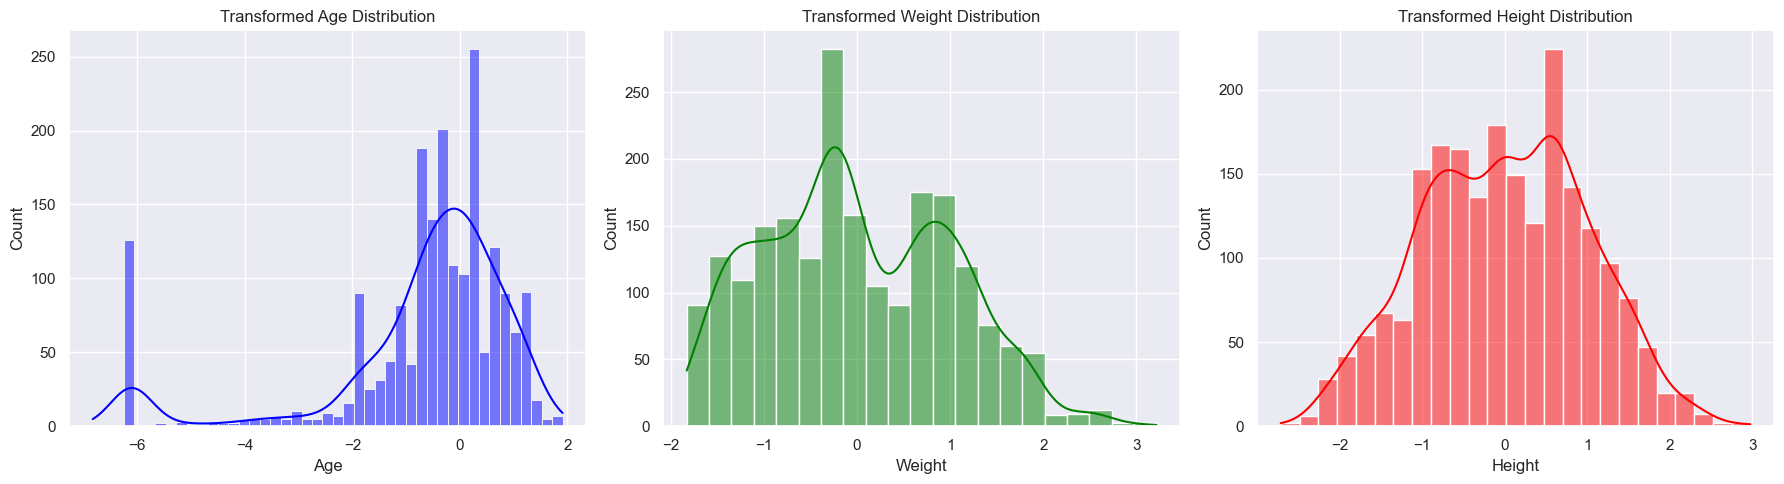

In [54]:
# Replot Histogram and KDE for Age, Weight, and Height after transformation or capping
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Re-plot for Age (after transformation or capping)
sns.histplot(data['Age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Transformed Age Distribution')

# Re-plot for Weight (after transformation or capping)
sns.histplot(data['Weight'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Transformed Weight Distribution')

# Re-plot for Height (after transformation or capping)
sns.histplot(data['Height'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Transformed Height Distribution')

plt.tight_layout()
plt.show()

In [55]:
# Re-check skewness after transformation
age_skewness_transformed = skew(data['Age'])
weight_skewness_transformed = skew(data['Weight'])
height_skewness_transformed = skew(data['Height'])

print(f"Skewness for Transformed Age: {age_skewness_transformed}")
print(f"Skewness for Transformed Weight: {weight_skewness_transformed}")
print(f"Skewness for Transformed Height: {height_skewness_transformed}")

Skewness for Transformed Age: nan
Skewness for Transformed Weight: 0.2407817437164858
Skewness for Transformed Height: -0.024725227049487392


In [56]:
data.to_csv('obese_data.csv', index=False)